In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [165]:
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


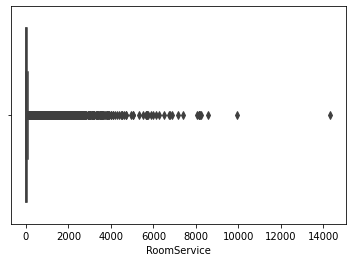

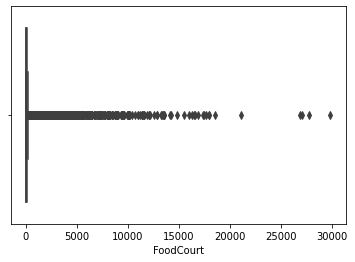

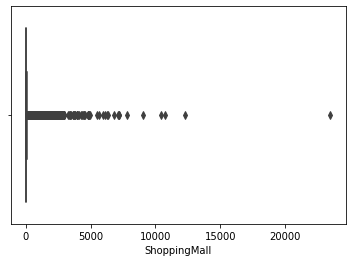

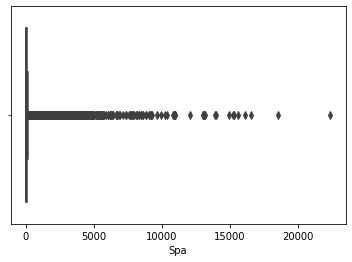

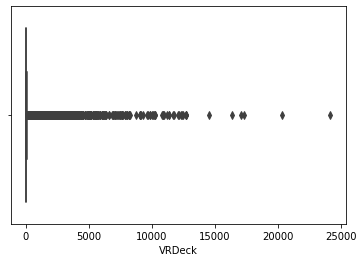

In [166]:
#check for outliers
sns.boxplot(x=df_train['RoomService'])
plt.show()
sns.boxplot(x=df_train['FoodCourt'])
plt.show()
sns.boxplot(x=df_train['ShoppingMall'])
plt.show()
sns.boxplot(x=df_train['Spa'])
plt.show()
sns.boxplot(x=df_train['VRDeck'])
plt.show()


In [167]:
distance_from_mean_rooms = np.abs(df_train['RoomService'] - df_train['RoomService'].mean())
distance_from_mean_foodcourt = np.abs(df_train['FoodCourt'] - df_train['FoodCourt'].mean())
distance_from_mean_shoppingmall = np.abs(df_train['ShoppingMall'] - df_train['ShoppingMall'].mean())
distance_from_mean_spa = np.abs(df_train['Spa'] - df_train['Spa'].mean())
distance_from_mean_vrdeck = np.abs(df_train['VRDeck'] - df_train['VRDeck'].mean())


In [168]:
std_rooms = df_train['RoomService'].std() * 3
std_foodcourt = df_train['FoodCourt'].std() * 3
std_shoppingmall = df_train['ShoppingMall'].std() * 3
std_spa = df_train['Spa'].std() * 3
std_vrdeck = df_train['VRDeck'].std() * 3

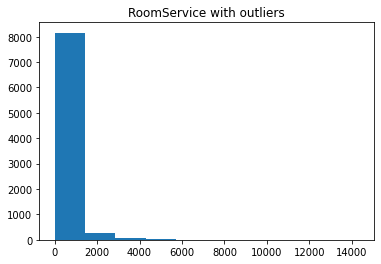

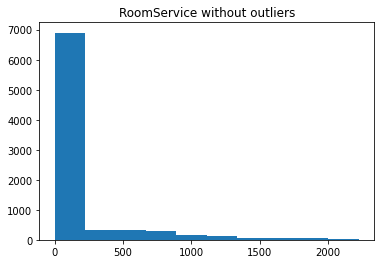

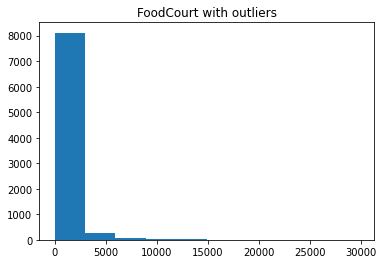

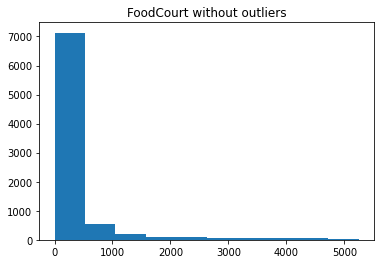

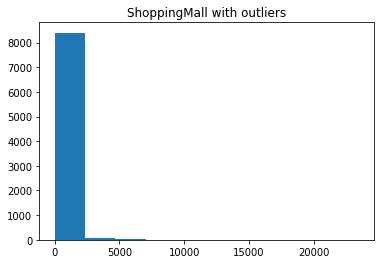

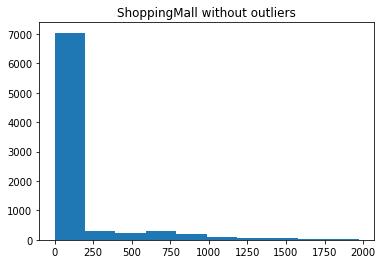

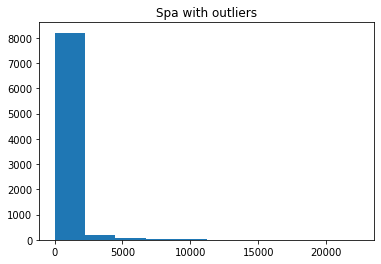

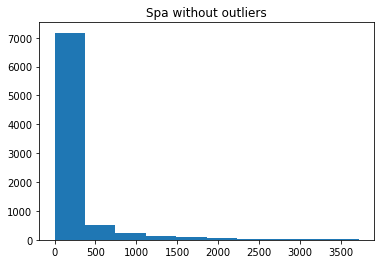

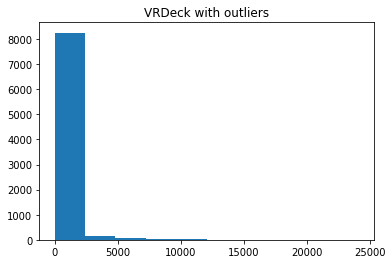

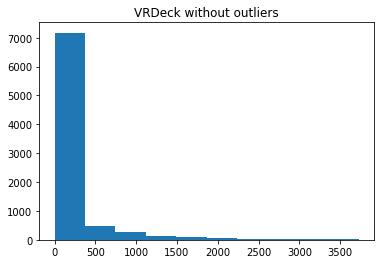

In [169]:
rooms_no_outliers = df_train[distance_from_mean_rooms < std_rooms]['RoomService']
foodcourt_no_outliers = df_train[distance_from_mean_foodcourt < std_foodcourt]['FoodCourt']
shoppingmall_no_outliers = df_train[distance_from_mean_shoppingmall < std_shoppingmall]['ShoppingMall']
spa_no_outliers = df_train[distance_from_mean_spa < std_spa]['Spa']
vrdeck_no_outliers = df_train[distance_from_mean_vrdeck < std_vrdeck]['VRDeck']
plt.title('RoomService with outliers')
plt.hist(df_train['RoomService'])
plt.show()
plt.title('RoomService without outliers')
plt.hist(rooms_no_outliers)
plt.show()
plt.title('FoodCourt with outliers')
plt.hist(df_train['FoodCourt'])
plt.show()
plt.title('FoodCourt without outliers')
plt.hist(foodcourt_no_outliers)
plt.show()
plt.title('ShoppingMall with outliers')
plt.hist(df_train['ShoppingMall'])
plt.show()
plt.title('ShoppingMall without outliers')
plt.hist(shoppingmall_no_outliers)
plt.show()
plt.title('Spa with outliers')
plt.hist(df_train['Spa'])
plt.show()
plt.title('Spa without outliers')
plt.hist(spa_no_outliers)
plt.show()
plt.title('VRDeck with outliers')
plt.hist(df_train['VRDeck'])
plt.show()
plt.title('VRDeck without outliers')
plt.hist(vrdeck_no_outliers)
plt.show()


In [170]:
df_train2=df_train.drop(['Name'],axis=1)
df_train2['RoomService']=df_train2[distance_from_mean_rooms < std_rooms]['RoomService']
df_train2['FoodCourt']=df_train2[distance_from_mean_foodcourt < std_foodcourt]['FoodCourt']
df_train2['ShoppingMall']=df_train2[distance_from_mean_shoppingmall < std_shoppingmall]['ShoppingMall']
df_train2['Spa']=df_train2[distance_from_mean_spa < std_spa]['Spa']
df_train2['VRDeck']=df_train2[distance_from_mean_vrdeck < std_vrdeck]['VRDeck']

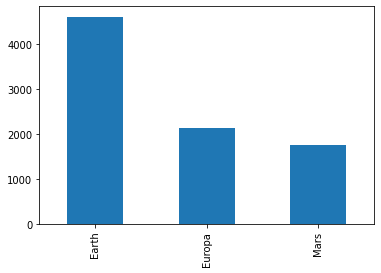

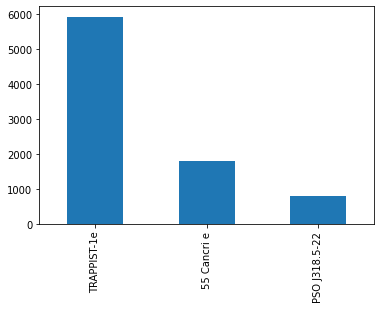

In [171]:
df_train2['HomePlanet'].value_counts()
df_train2['HomePlanet'].value_counts().plot(kind='bar')
plt.show()
df_train2['Destination'].value_counts()
df_train2['Destination'].value_counts().plot(kind='bar')
df_train2['HomePlanet'].fillna('Unknown',inplace=True)
df_train2['Cabin'].fillna('Unknown',inplace=True)
df_train2['HomePlanet_binary']=df_train2['HomePlanet'].apply(lambda x: 0 if x=='Unknown' else 1)
df_train2['Cabin_binary']=df_train2['Cabin'].apply(lambda x: 0 if x=='Unknown' else 1)


In [172]:
df_train2['CryoSleep'].fillna('False',inplace=True)
df_train2['VIP'].fillna('False',inplace=True)
df_train_eval=df_train2.copy()

In [173]:
#import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
object_cols=['Cabin']
df_train_eval[object_cols]=ordinal_encoder.fit_transform(df_train_eval[object_cols])
df_train_eval.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_binary,Cabin_binary
0,0001_01,Europa,False,149.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1
1,0002_01,Earth,False,2184.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,1.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,NaN,49.0,False,1,1
3,0003_02,Europa,False,1.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,1
4,0004_01,Earth,False,2186.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [174]:
#one hot encoding
df_train_eval=pd.get_dummies(df_train_eval,columns=['HomePlanet','Destination'],drop_first=True)
df_train_eval.dropna(inplace=True)
df_train_eval.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_binary,Cabin_binary,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,149.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,1,0,0,0,1
1,0002_01,False,2184.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1,0,0,0,0,1
3,0003_02,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,1,1,0,0,0,1
4,0004_01,False,2186.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,0,0,0,0,1
5,0005_01,False,2183.0,44.0,False,0.0,483.0,0.0,291.0,0.0,True,1,1,0,0,0,1,0


In [175]:
#convert true false to 1 0
df_train_eval=df_train_eval.replace({'True':1,'False':0})
df_train_eval.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_binary,Cabin_binary,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,149.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,1,0,0,0,1
1,0002_01,False,2184.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1,0,0,0,0,1
3,0003_02,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,1,1,0,0,0,1
4,0004_01,False,2186.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,0,0,0,0,1
5,0005_01,False,2183.0,44.0,False,0.0,483.0,0.0,291.0,0.0,True,1,1,0,0,0,1,0


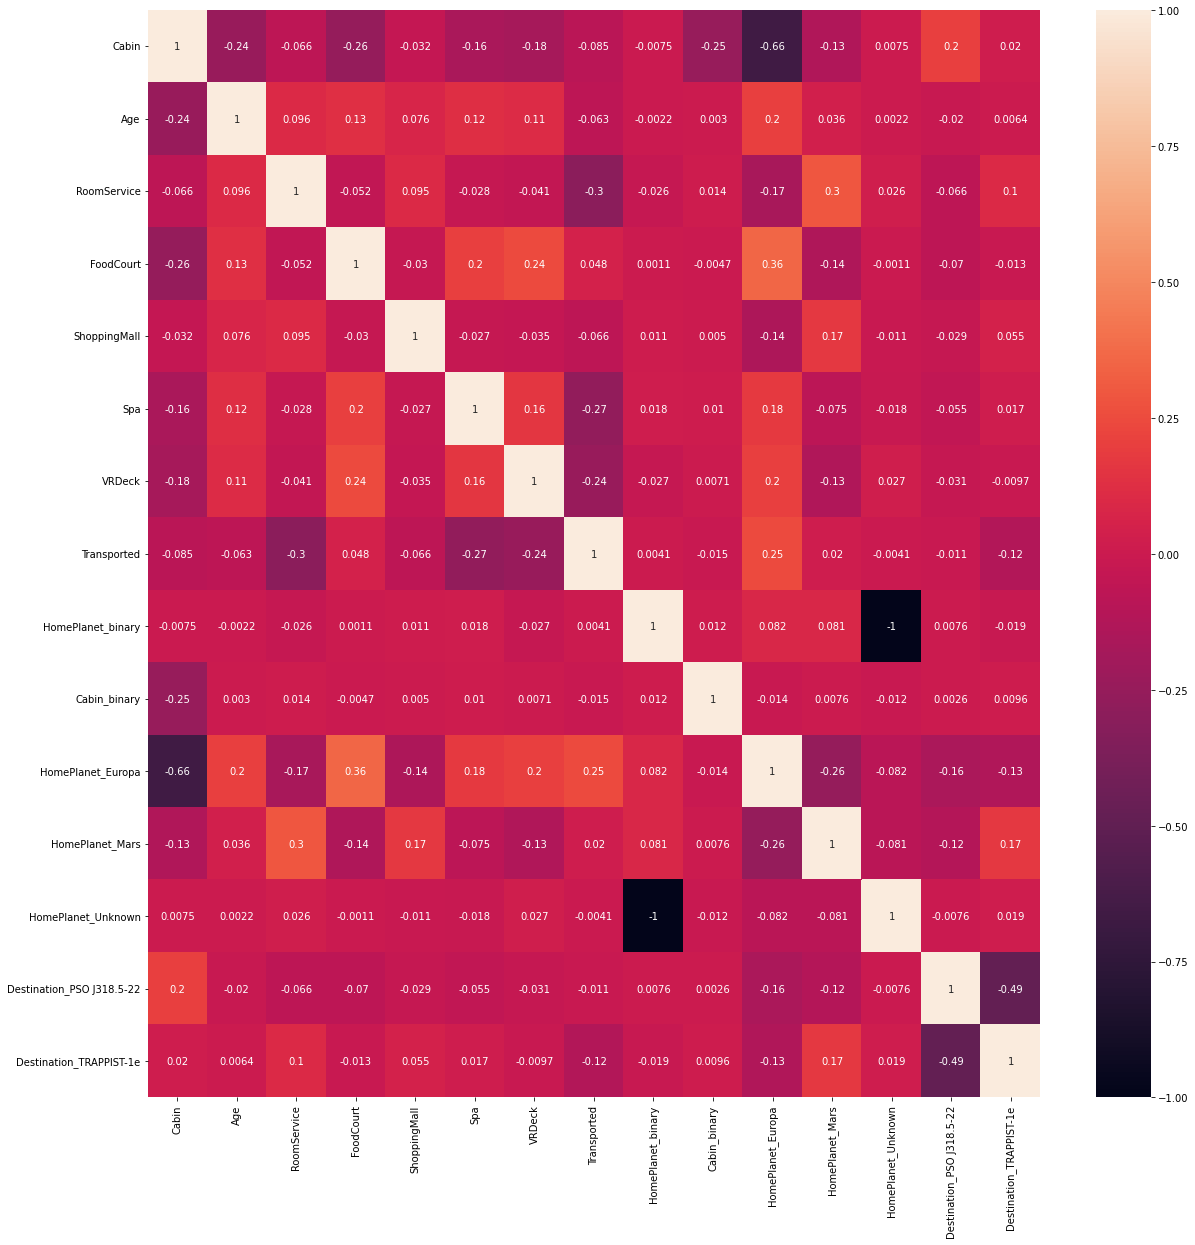

In [176]:
#draw heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train_eval.corr(),annot=True)
plt.show()

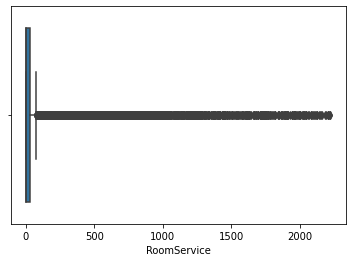

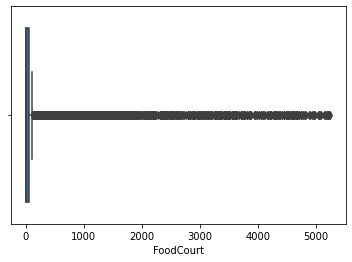

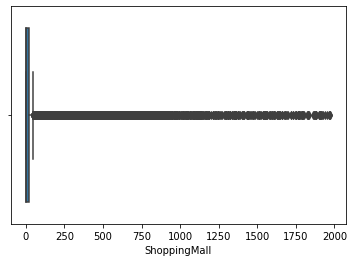

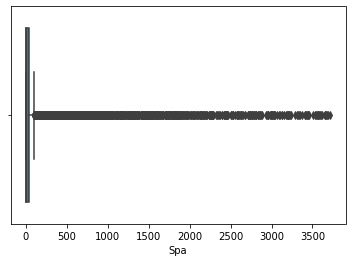

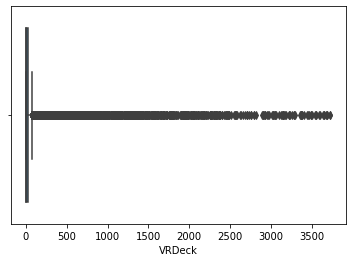

In [177]:
sns.boxplot(x=df_train2['RoomService'])
plt.show()
sns.boxplot(x=df_train2['FoodCourt'])
plt.show()
sns.boxplot(x=df_train2['ShoppingMall'])
plt.show()
sns.boxplot(x=df_train2['Spa'])
plt.show()
sns.boxplot(x=df_train2['VRDeck'])
plt.show()

In [178]:
#import test train split
from sklearn.model_selection import train_test_split
X=df_train_eval.drop(['Transported','PassengerId'],axis=1).astype(np.float32)
y=df_train_eval['Transported'].astype(np.float32)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
input_shape=[X_train.shape[1]]
print(input_shape)

[16]


In [179]:
model=keras.Sequential([
    keras.layers.BatchNormalization(input_shape=input_shape),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1,activation='sigmoid'),
])
#convert numpy to tensor
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)

In [180]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
model.compile(optimizer=Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['binary_accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_42 (Dense)            (None, 128)               2176      
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_37 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_37 (Dropout)        (None, 64)               

Epoch 1/100
44/44 [==============================] - 3s 15ms/step - loss: 0.7065 - binary_accuracy: 0.5532 - val_loss: 0.6637 - val_binary_accuracy: 0.5043
Epoch 2/100
44/44 [==============================] - 0s 7ms/step - loss: 0.6077 - binary_accuracy: 0.6624 - val_loss: 0.4850 - val_binary_accuracy: 0.7607
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.5500 - binary_accuracy: 0.7161 - val_loss: 0.4627 - val_binary_accuracy: 0.7629
Epoch 4/100
44/44 [==============================] - 0s 10ms/step - loss: 0.5244 - binary_accuracy: 0.7459 - val_loss: 0.4851 - val_binary_accuracy: 0.7572
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.5171 - binary_accuracy: 0.7502 - val_loss: 0.4592 - val_binary_accuracy: 0.7758
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.5163 - binary_accuracy: 0.7548 - val_loss: 0.4535 - val_binary_accuracy: 0.7858
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - l

<AxesSubplot:title={'center':'Accuracy'}>

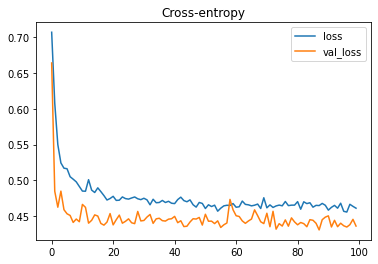

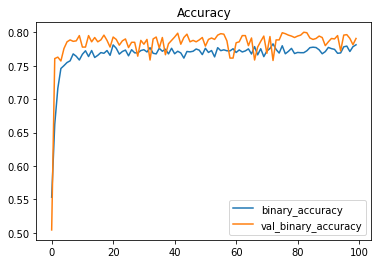

In [181]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=75,
    min_delta=0.001,
    restore_best_weights=True,
)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=100,callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [182]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


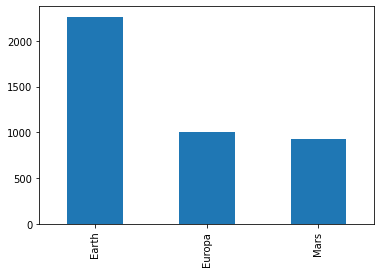

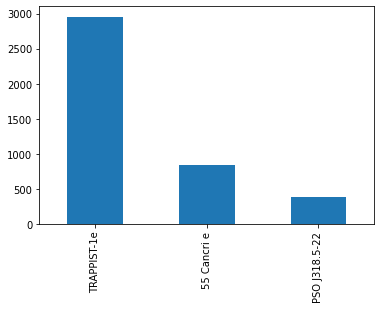

In [183]:
df_test['HomePlanet'].value_counts()
df_test['HomePlanet'].value_counts().plot(kind='bar')
plt.show()
df_test['Destination'].value_counts()
df_test['Destination'].value_counts().plot(kind='bar')
df_test['HomePlanet'].fillna('Unknown',inplace=True)
df_test['Cabin'].fillna('Unknown',inplace=True)
df_test['HomePlanet_binary']=df_test['HomePlanet'].apply(lambda x: 0 if x=='Unknown' else 1)
df_test['Cabin_binary']=df_test['Cabin'].apply(lambda x: 0 if x=='Unknown' else 1)


In [184]:
df_test['CryoSleep'].fillna('False',inplace=True)
df_test['VIP'].fillna('False',inplace=True)
df_test_eval=df_test.drop(['PassengerId','Name'],axis=1)
df_test_eval.replace({'True':1,'False':0},inplace=True)


In [185]:
df_test_eval[object_cols]=ordinal_encoder.fit_transform(df_test_eval[object_cols])
df_test_eval.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_binary,Cabin_binary
0,Earth,True,2784.0,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1,1
1,Earth,False,1867.0,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,1
2,Europa,True,257.0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,1
3,Europa,False,259.0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,1
4,Earth,False,1940.0,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,1


In [186]:
df_test_eval=df_test_eval.replace({'True':1,'False':0})
df_test_eval.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_binary,Cabin_binary
0,Earth,True,2784.0,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1,1
1,Earth,False,1867.0,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,1
2,Europa,True,257.0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,1
3,Europa,False,259.0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,1
4,Earth,False,1940.0,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,1


In [187]:
df_test_eval=df_test_eval.copy()

In [188]:
df_test_eval=pd.get_dummies(df_test_eval,columns=['HomePlanet','Destination'],drop_first=True)
df_test_eval.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_binary,Cabin_binary,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,2784.0,27.0,False,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,1
1,False,1867.0,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,1,0,0,0,0,1
2,True,257.0,31.0,False,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0
3,False,259.0,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,1,1,0,0,0,1
4,False,1940.0,20.0,False,10.0,0.0,635.0,0.0,0.0,1,1,0,0,0,0,1


In [189]:
df_test_eval=tf.convert_to_tensor(df_test_eval,dtype=tf.float32)

In [190]:
df_test['Transported']=model.predict(df_test_eval)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1,0.631045
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1,0.033595
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1,0.998897
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,0.999674
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1,0.551727


In [191]:
df_test['Transported']=df_test['Transported'].apply(lambda x: 1 if x>0.5 else 0)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1,1


In [192]:
df_test['Transported']=df_test['Transported'].apply(lambda x: 'True' if x==1 else 'False')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1,True


In [193]:
df_sub=df_test[['PassengerId','Transported']]
df_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [194]:
#create a csv file
df_sub.to_csv('submission.csv',index=False)